# Importing data

In [1]:
import pandas as pd

# Set the maximum number of rows to display to a large number
pd.set_option('display.max_columns', None)

In [2]:
from ucimlrepo import fetch_ucirepo

# Fetch dataset
data = fetch_ucirepo(id=697)

# Create a single DataFrame during import
df = data.data.original

# Check the structure of the DataFrame
df.head(20)


,Marital Status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,Mother's occupation,Father's occupation,Admission grade,Displaced,Educational special needs,Debtor,Tuition fees up to date,Gender,Scholarship holder,Age at enrollment,International,Curricular units 1st sem (credited),Curricular units 1st sem (enrolled),Curricular units 1st sem (evaluations),Curricular units 1st sem (approved),Curricular units 1st sem (grade),Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,17,5,171,1,1,122.0,1,19,12,5,9,127.3,1,0,0,1,1,0,20,0,0,0,0,0,0.000000,0,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,15,1,9254,1,1,160.0,1,1,3,3,3,142.5,1,0,0,0,1,0,19,0,0,6,6,6,14.000000,0,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,9070,1,1,122.0,1,37,37,9,9,124.8,1,0,0,0,1,0,19,0,0,6,0,0,0.000000,0,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,17,2,9773,1,1,122.0,1,38,37,5,3,119.6,1,0,0,1,0,0,20,0,0,6,8,6,13.428571,0,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,39,1,8014,0,1,100.0,1,37,38,9,9,141.5,0,0,0,1,0,0,45,0,0,6,9,5,12.333333,0,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate
5,2,39,1,9991,0,19,133.1,1,37,37,9,7,114.8,0,0,1,1,1,0,50,0,0,5,10,5,11.857143,0,0,5,17,5,11.500000,5,16.2,0.3,-0.92,Graduate
6,1,1,1,9500,1,1,142.0,1,19,38,7,10,128.4,1,0,0,1,0,1,18,0,0,7,9,7,13.300000,0,0,8,8,8,14.345000,0,15.5,2.8,-4.06,Graduate
7,1,18,4,9254,1,1,119.0,1,37,37,9,9,113.1,1,0,0,0,1,0,22,0,0,5,5,0,0.000000,0,0,5,5,0,0.000000,0,15.5,2.8,-4.06,Dropout
8,1,1,3,9238,1,1,137.0,62,1,1,9,9,129.3,0,0,0,1,0,1,21,1,0,6,8,6,13.875000,0,0,6,7,6,14.142857,0,16.2,0.3,-0.92,Graduate
9,1,1,1,9238,1,1,138.0,1,1,19,4,7,123.0,1,0,1,0,0,0,18,0,0,6,9,5,11.400000,0,0,6,14,2,13.500000,0,8.9,1.4,3.51,Dropout


In [3]:
df['Previous qualification (grade)'][40:70]

40    126.0
41    133.0
42    103.0
43    120.0
44    133.1
45    154.0
46    130.0
47    132.0
48    130.0
49    139.0
50    130.0
51    139.0
52    127.0
53    167.0
54    130.0
55    130.0
56    130.0
57    129.0
58    141.0
59    125.0
60    125.0
61    130.0
62    133.0
63    127.0
64    116.0
65    133.1
66    139.0
67    130.0
68    125.0
69    160.0
Name: Previous qualification (grade), dtype: float64

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 37 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Marital Status                                  4424 non-null   int64  
 1   Application mode                                4424 non-null   int64  
 2   Application order                               4424 non-null   int64  
 3   Course                                          4424 non-null   int64  
 4   Daytime/evening attendance                      4424 non-null   int64  
 5   Previous qualification                          4424 non-null   int64  
 6   Previous qualification (grade)                  4424 non-null   float64
 7   Nacionality                                     4424 non-null   int64  
 8   Mother's qualification                          4424 non-null   int64  
 9   Father's qualification                   

The dataset and information about it can be found here: https://archive.ics.uci.edu/dataset/697/predict+students+dropout+and+academic+success 

The following columns are categorical (some represented numerically):
* Marital status
* Application mode
* Course
* Daytime/evening attendance
* Previous qualification
* Nacionality
* Mother's qualification
* Father's qualification
* Mother's occupation
* Father's occupation
* Displaced
* Educational special needs
* Debtor
* Tuition fees up to date
* Gender
* Scholarship holder
* International
* Target

The following columns are numerical (discrete):
* Application order
* Age at enrollment
* Curricular units 1st sem (credited)             
* Curricular units 1st sem (enrolled)
* Curricular units 1st sem (evaluations)
* Curricular units 1st sem (approved)
* Curricular units 1st sem (without evaluations)
* Curricular units 2nd sem (credited)
* Curricular units 2nd sem (enrolled)
* Curricular units 2nd sem (evaluations)
* Curricular units 2nd sem (approved)
* Curricular units 2nd sem (without evaluations)

The following columns are numerical (continuous):
* Previous qualification (grade)
* Admission grade
* Curricular units 1st sem (grade)
* Curricular units 2nd sem (grade)
* Unemployment rate
* Inflation rate
* GDP

In [5]:
# 4424 entries and 4424 non-null values in each column 
# But just to verify
df.isnull().all()

Marital Status                                    False
Application mode                                  False
Application order                                 False
Course                                            False
Daytime/evening attendance                        False
Previous qualification                            False
Previous qualification (grade)                    False
Nacionality                                       False
Mother's qualification                            False
Father's qualification                            False
Mother's occupation                               False
Father's occupation                               False
Admission grade                                   False
Displaced                                         False
Educational special needs                         False
Debtor                                            False
Tuition fees up to date                           False
Gender                                          

In [6]:
# Check the number of 0s in each column
for col in df.columns:
    zeros_in_col = (df[col] == 0).sum()
    print(f"Zeros in {col} column: {zeros_in_col}")

Zeros in Marital Status column: 0
Zeros in Application mode column: 0
Zeros in Application order column: 1
Zeros in Course column: 0
Zeros in Daytime/evening attendance column: 483
Zeros in Previous qualification column: 0
Zeros in Previous qualification (grade) column: 0
Zeros in Nacionality column: 0
Zeros in Mother's qualification column: 0
Zeros in Father's qualification column: 0
Zeros in Mother's occupation column: 144
Zeros in Father's occupation column: 128
Zeros in Admission grade column: 0
Zeros in Displaced column: 1998
Zeros in Educational special needs column: 4373
Zeros in Debtor column: 3921
Zeros in Tuition fees up to date column: 528
Zeros in Gender column: 2868
Zeros in Scholarship holder column: 3325
Zeros in Age at enrollment column: 0
Zeros in International column: 4314
Zeros in Curricular units 1st sem (credited) column: 3847
Zeros in Curricular units 1st sem (enrolled) column: 180
Zeros in Curricular units 1st sem (evaluations) column: 349
Zeros in Curricular uni

In [7]:
# Continuous columns - Previous qualification (grade), Admission grade, Unemployment rate, Inflation rate, GDP
# Can be found here - https://storage.googleapis.com/kaggle-forum-message-attachments/1832313/17922/Features%20information.pdf
# Check the unique values in the discrete columns
cols_not_to_check_unique_vals_in = ["Previous qualification (grade)", "Admission grade", "Curricular units 1st sem (grade)", "Curricular units 2nd sem (grade)"]
for col in df.columns:
    if col not in cols_not_to_check_unique_vals_in:
        print(f"Unique values in {col} column: {df[col].unique()}")

Unique values in Marital Status column: [1 2 4 3 5 6]
Unique values in Application mode column: [17 15  1 39 18 53 44 51 43  7 42 16  5  2 10 57 26 27]
Unique values in Application order column: [5 1 2 4 3 6 9 0]
Unique values in Course column: [ 171 9254 9070 9773 8014 9991 9500 9238 9670 9853 9085 9130 9556 9147
 9003   33 9119]
Unique values in Daytime/evening attendance column: [1 0]
Unique values in Previous qualification column: [ 1 19 42 39 10  3 40  2  4 12 43 15  6  9 38  5 14]
Unique values in Nacionality column: [  1  62   6  41  26 103  13  25  21 101  11  22  32 100  24 109   2 108
 105  14  17]
Unique values in Mother's qualification column: [19  1 37 38  3  4 42  2 34 12 40  9  5 39 11 41 30 14 35 36  6 10 29 43
 18 22 27 26 44]
Unique values in Father's qualification column: [12  3 37 38  1 19  5  4 34  2 39 11  9 36 26 40 14 20 35 41 22 13 29 43
 18 42 10  6 30 25 44 33 27 31]
Unique values in Mother's occupation column: [  5   3   9   7   4   1 125   0   6   2  90   8

In [8]:
# Check the unique values in each column
# cols_not_to_check_unique_vals_in = ["Height", "Weight", ]
for col in df:
# if col not in cols_not_to_check_unique_vals_in:
        # print(col)
        print(f"{col} column no. unique values: {df[col].nunique()}")

Marital Status column no. unique values: 6
Application mode column no. unique values: 18
Application order column no. unique values: 8
Course column no. unique values: 17
Daytime/evening attendance column no. unique values: 2
Previous qualification column no. unique values: 17
Previous qualification (grade) column no. unique values: 101
Nacionality column no. unique values: 21
Mother's qualification column no. unique values: 29
Father's qualification column no. unique values: 34
Mother's occupation column no. unique values: 32
Father's occupation column no. unique values: 46
Admission grade column no. unique values: 620
Displaced column no. unique values: 2
Educational special needs column no. unique values: 2
Debtor column no. unique values: 2
Tuition fees up to date column no. unique values: 2
Gender column no. unique values: 2
Scholarship holder column no. unique values: 2
Age at enrollment column no. unique values: 46
International column no. unique values: 2
Curricular units 1st s

Marital Status


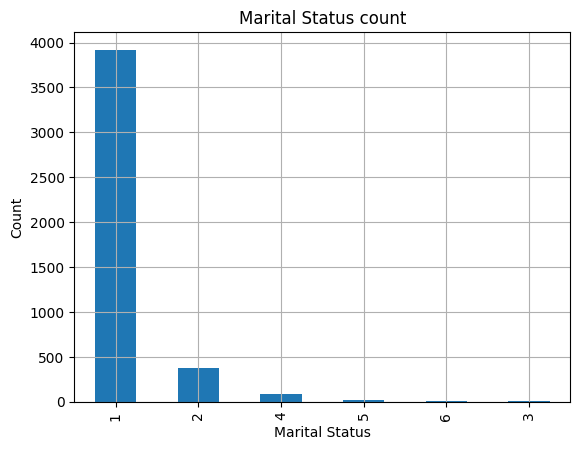

Application mode


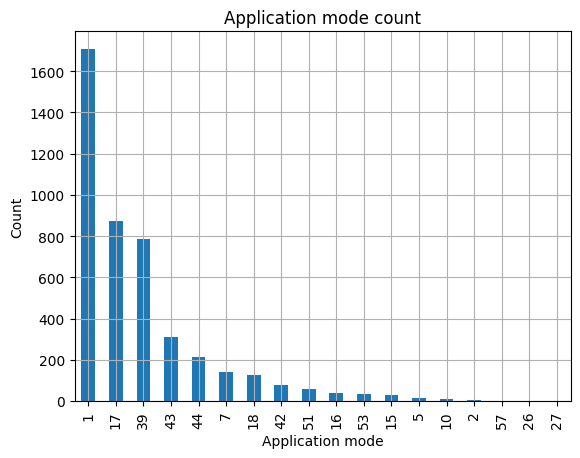

Course


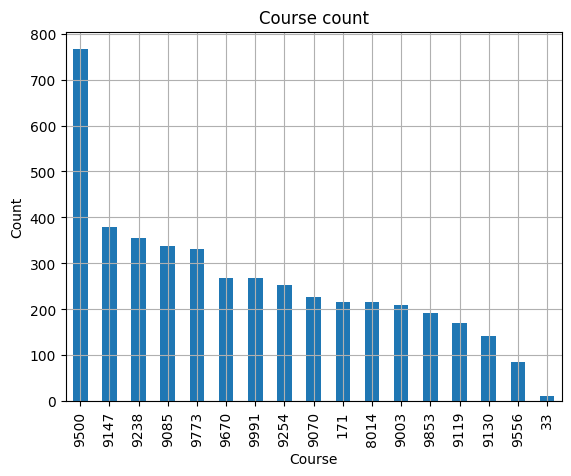

Daytime/evening attendance


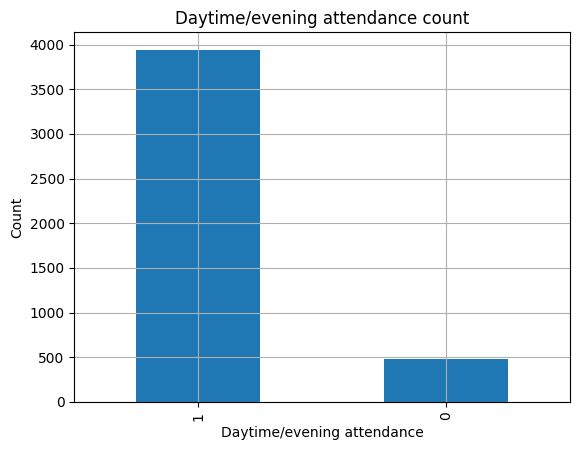

Previous qualification


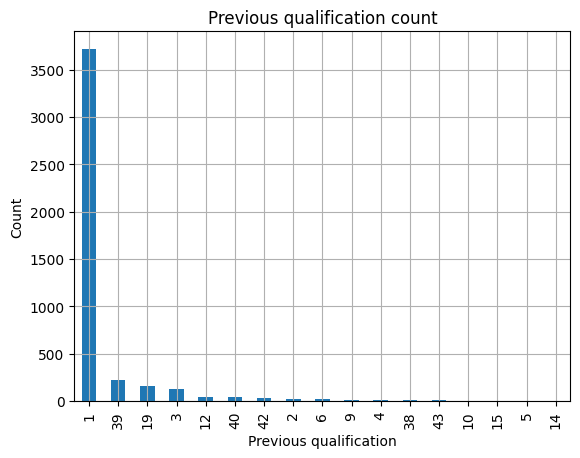

Nacionality


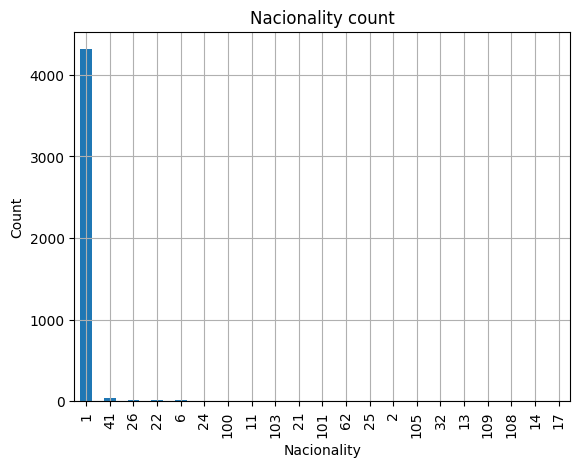

Mother's qualification


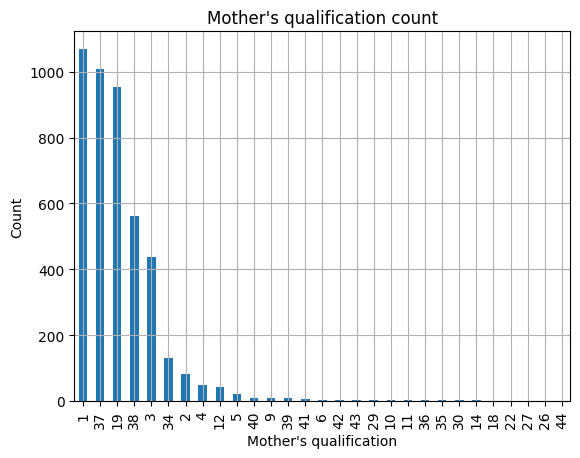

Father's qualification


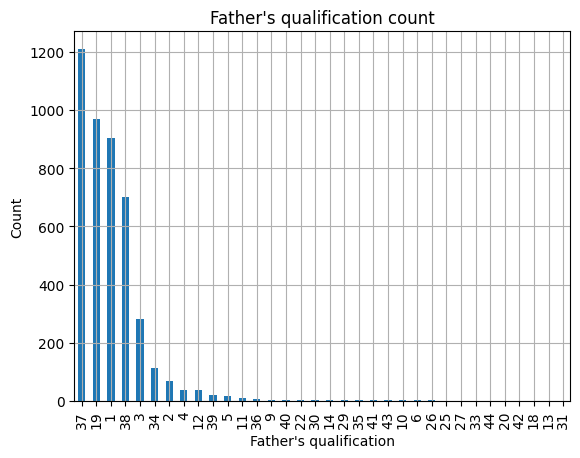

Mother's occupation


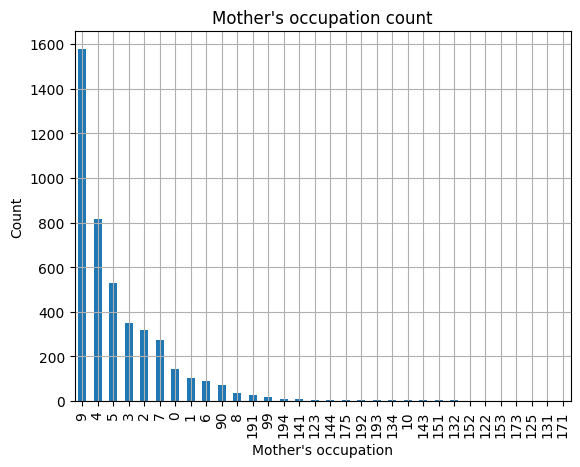

Father's occupation


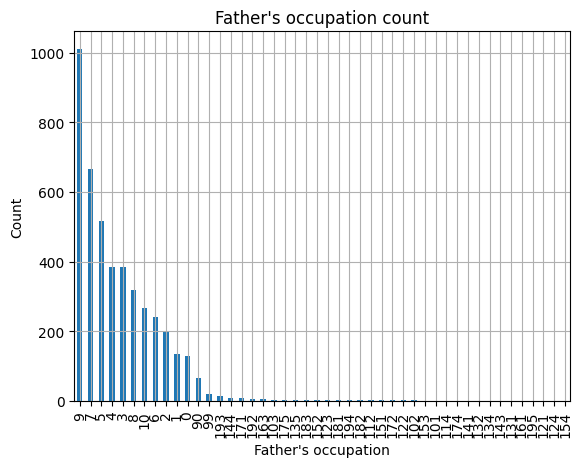

Displaced


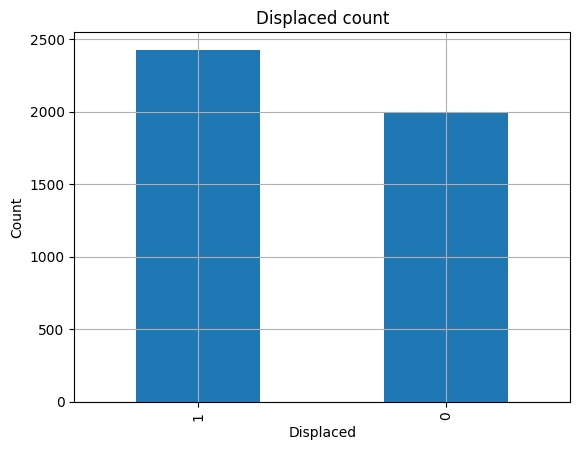

Educational special needs


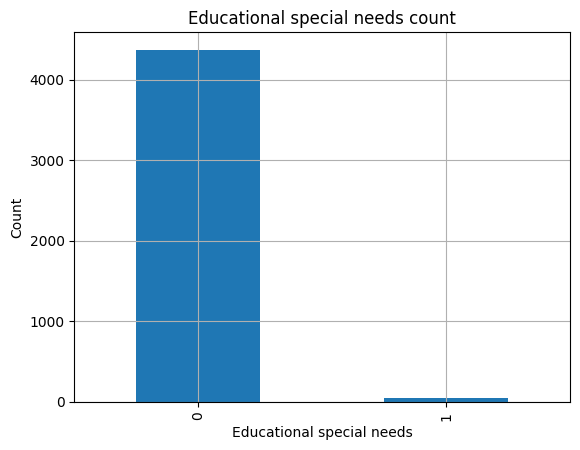

Debtor


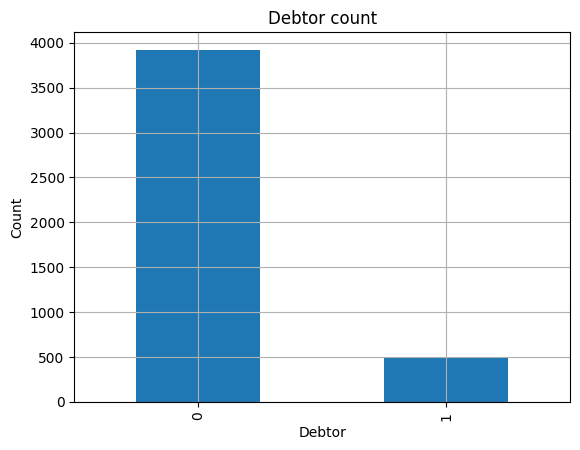

Tuition fees up to date


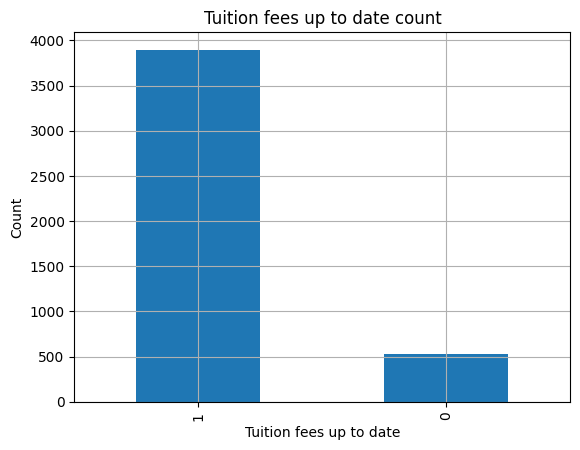

Gender


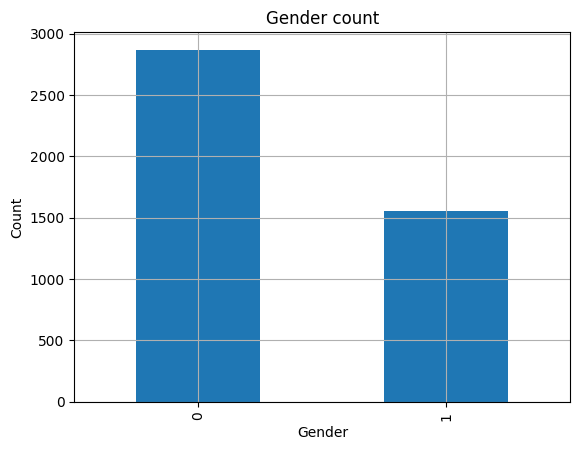

Scholarship holder


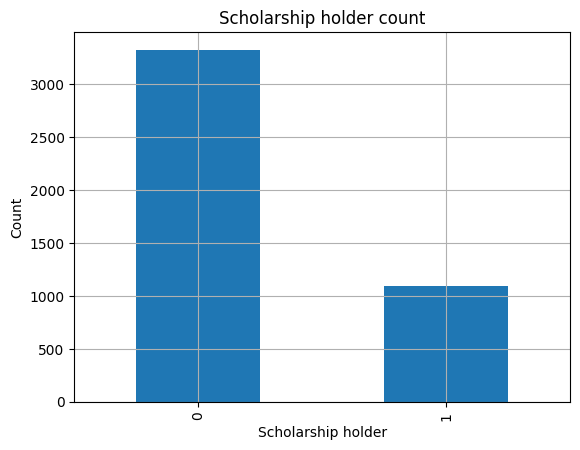

International


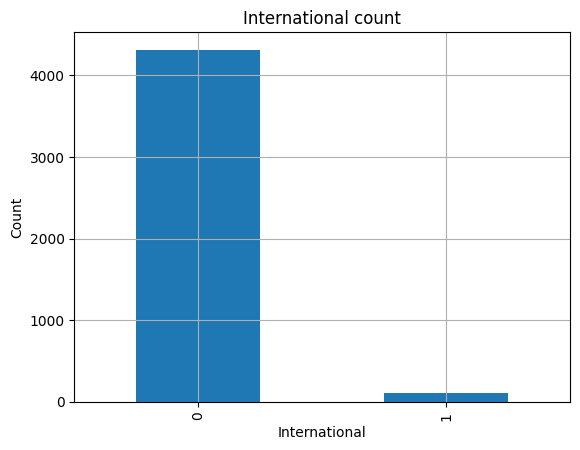

Target


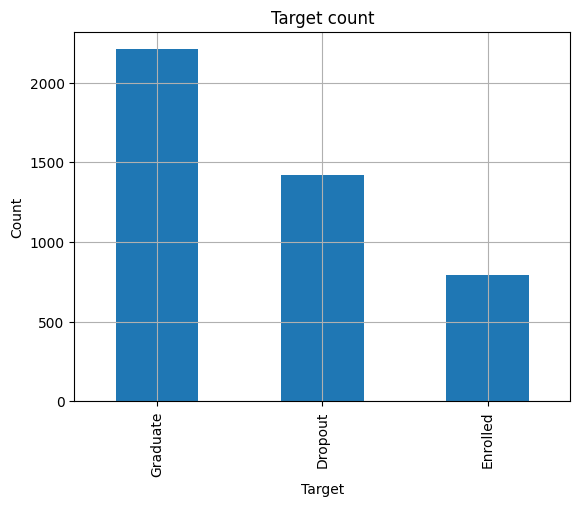

In [9]:
# Do some plotting next to understand the data

categorical_cols = [
    "Marital Status",
    "Application mode",
    "Course",
    "Daytime/evening attendance",
    "Previous qualification",
    "Nacionality",
    "Mother's qualification",
    "Father's qualification",
    "Mother's occupation",
    "Father's occupation",
    "Displaced",
    "Educational special needs",
    "Debtor",
    "Tuition fees up to date",
    "Gender",
    "Scholarship holder",
    "International",
    "Target"
]

import matplotlib.pyplot as plt

for col in categorical_cols:
    print(col)
    value_counts = df[col].value_counts()
    value_counts.plot(kind='bar')
    plt.ylabel("Count")
    plt.xlabel(col)
    plt.grid()
    plt.title(f"{col} count")
    plt.show()

Application order


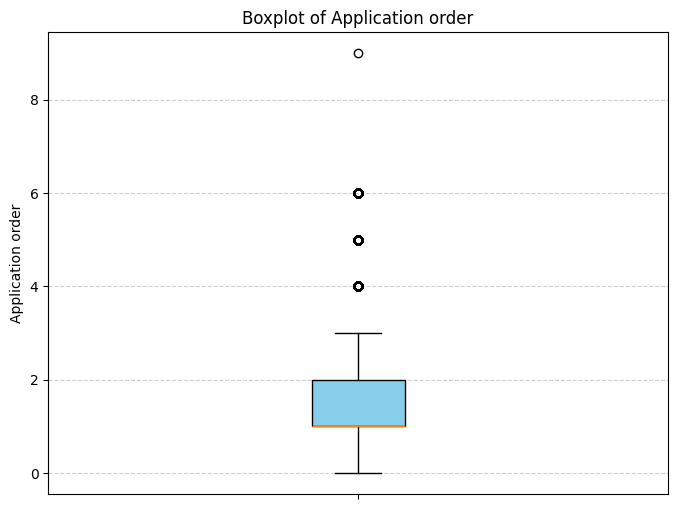

Age at enrollment


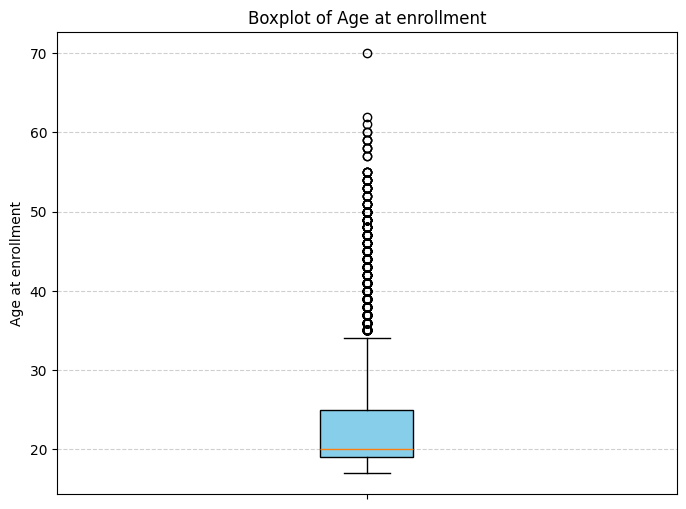

Curricular units 1st sem (credited)


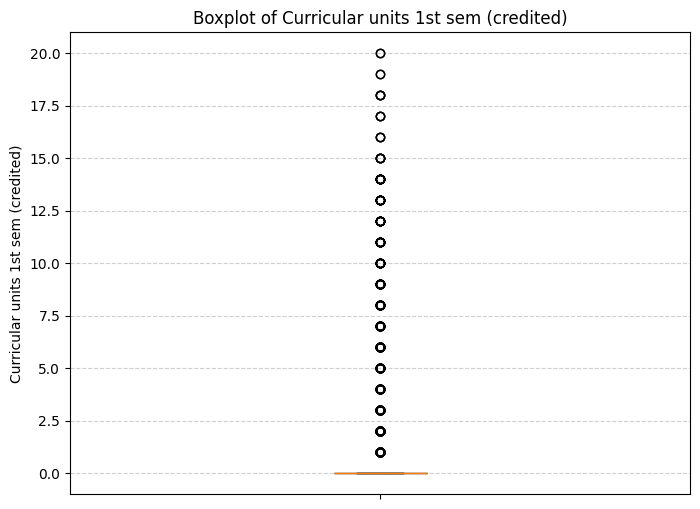

Curricular units 1st sem (enrolled)


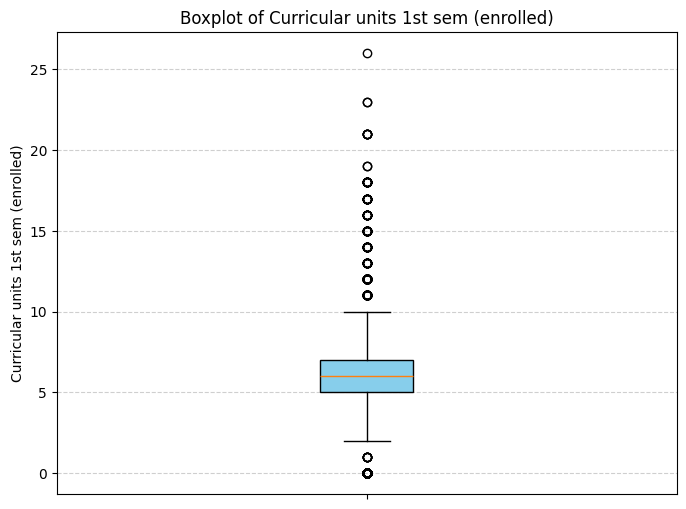

Curricular units 1st sem (evaluations)


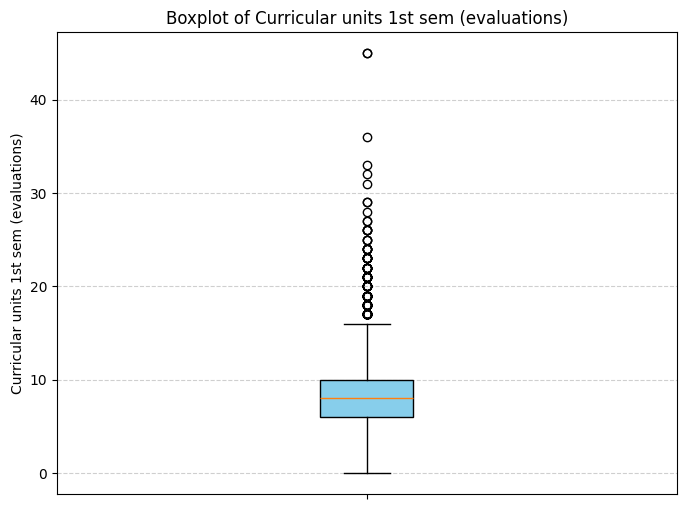

Curricular units 1st sem (approved)


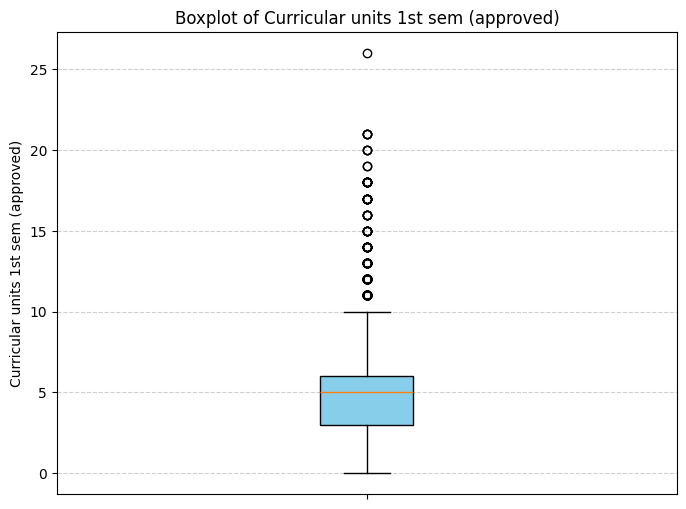

Curricular units 1st sem (without evaluations)


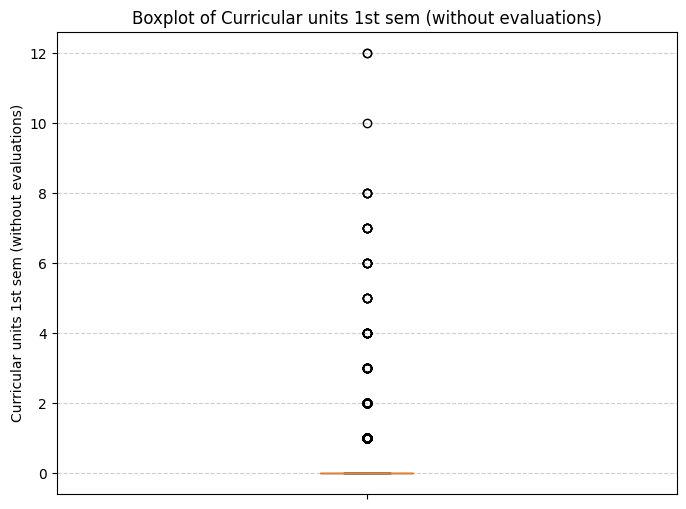

Curricular units 2nd sem (credited)


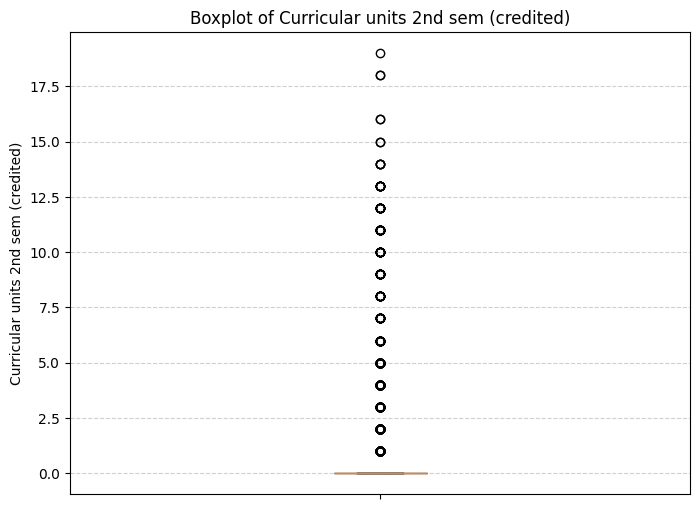

Curricular units 2nd sem (enrolled)


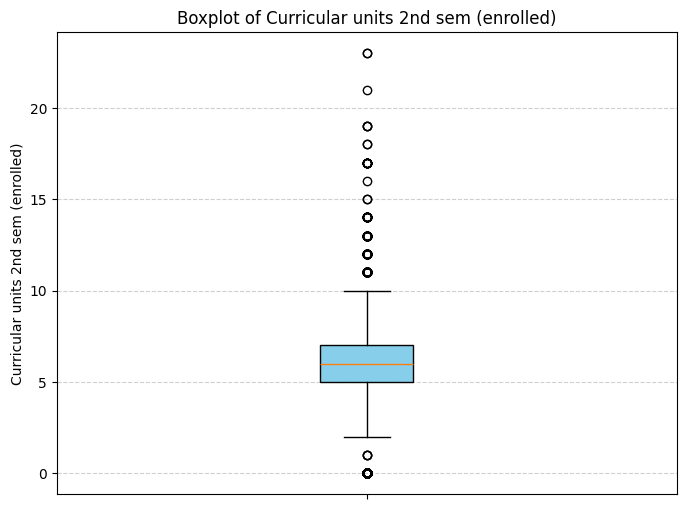

Curricular units 2nd sem (evaluations)


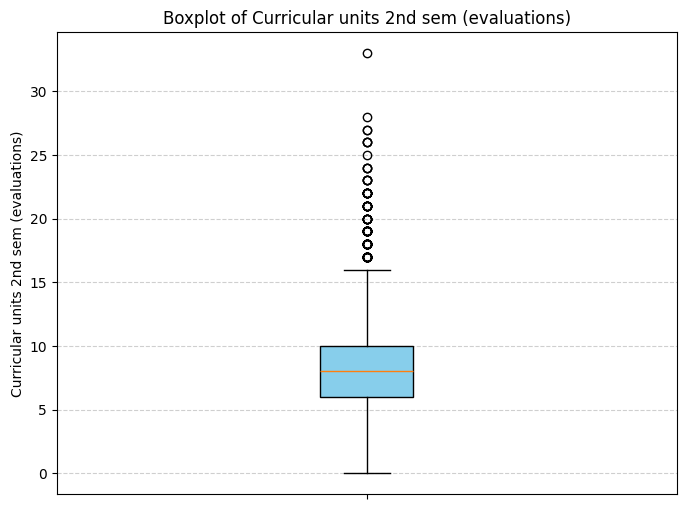

Curricular units 2nd sem (approved)


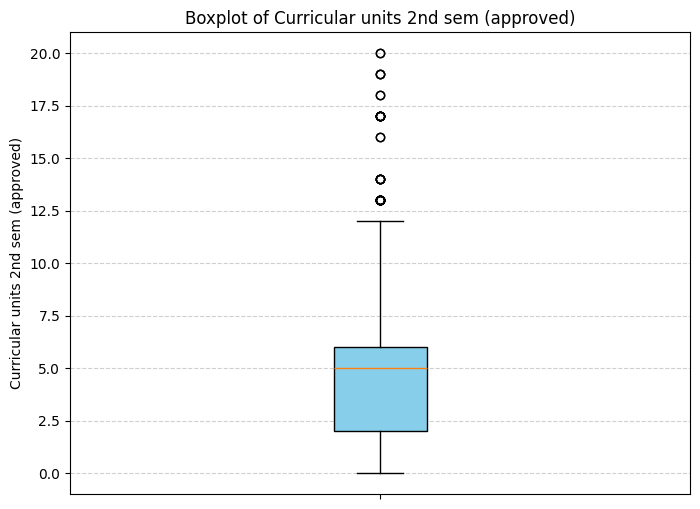

Curricular units 2nd sem (without evaluations)


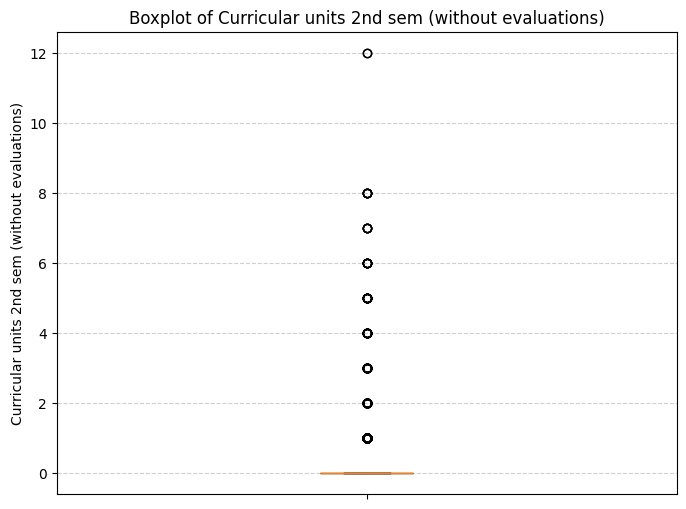

Previous qualification (grade)


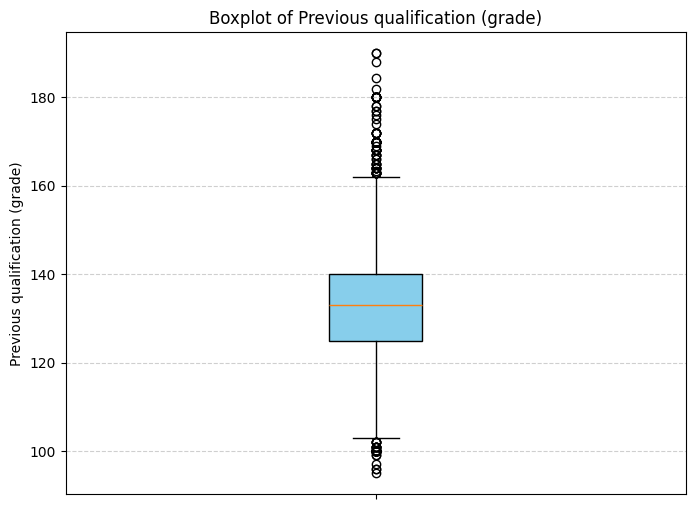

Admission grade


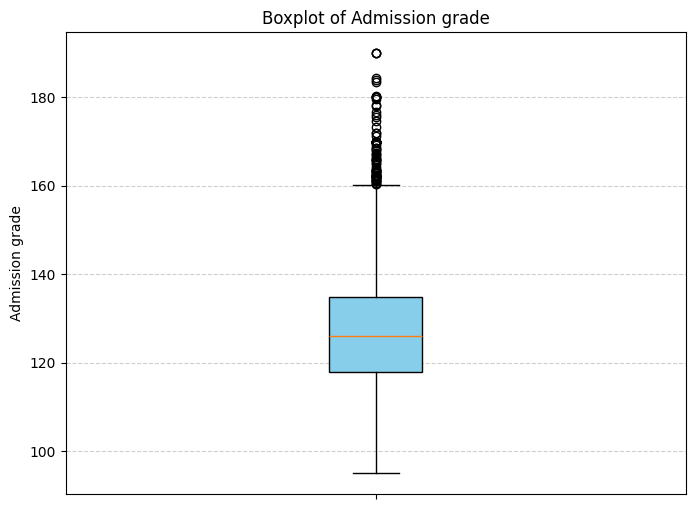

Curricular units 1st sem (grade)


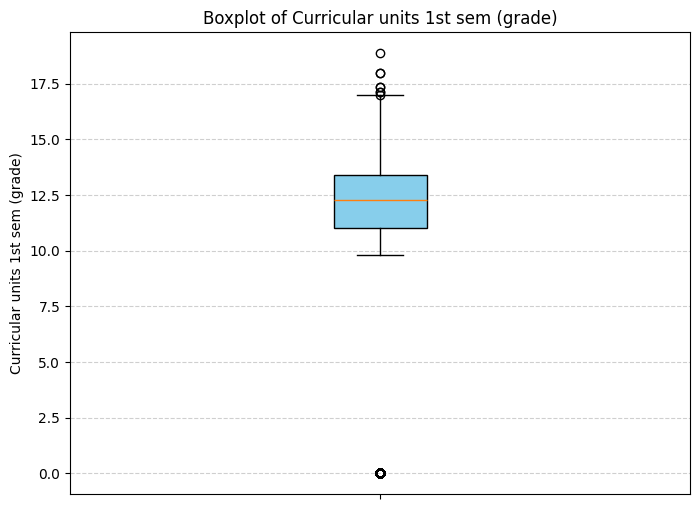

Curricular units 2nd sem (grade)


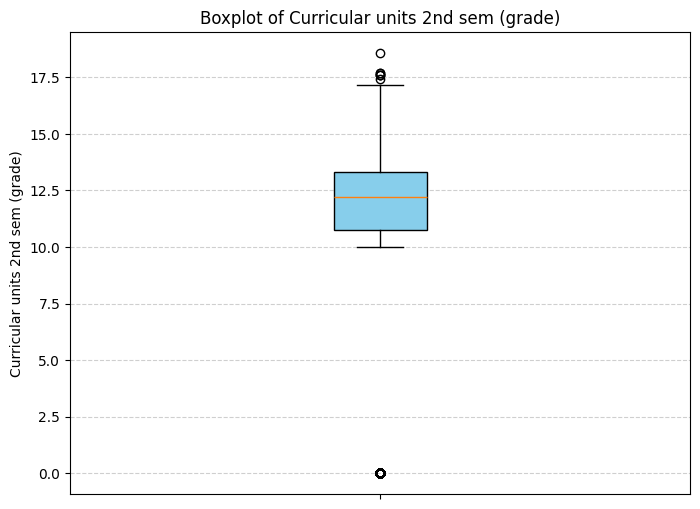

Unemployment rate


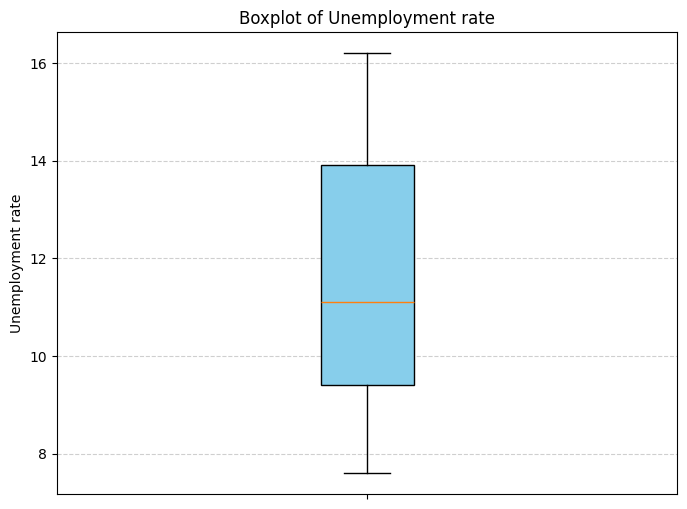

Inflation rate


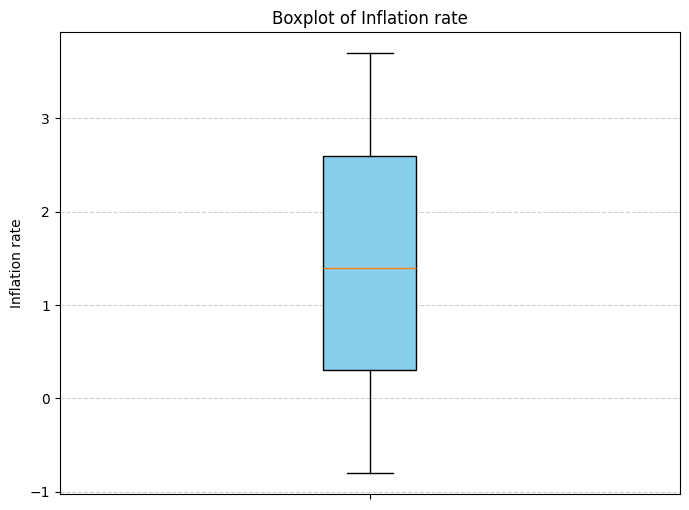

GDP


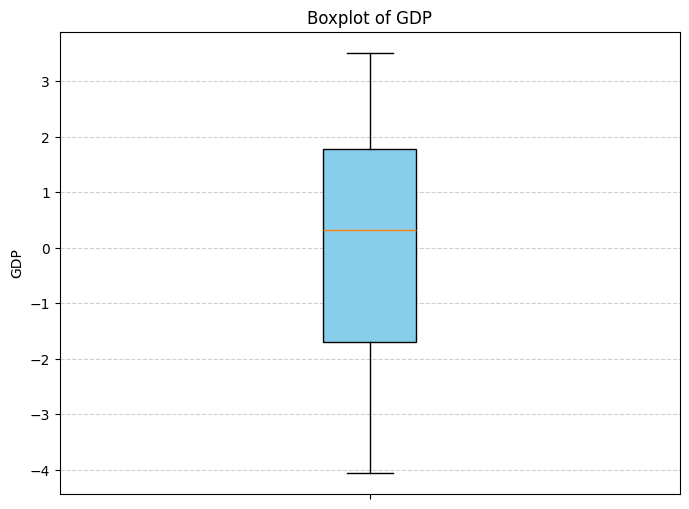

In [29]:
numerical_cols = [
    "Application order",
    "Age at enrollment",
    "Curricular units 1st sem (credited)",
    "Curricular units 1st sem (enrolled)",
    "Curricular units 1st sem (evaluations)",
    "Curricular units 1st sem (approved)",
    "Curricular units 1st sem (without evaluations)",
    "Curricular units 2nd sem (credited)",
    "Curricular units 2nd sem (enrolled)",
    "Curricular units 2nd sem (evaluations)",
    "Curricular units 2nd sem (approved)",
    "Curricular units 2nd sem (without evaluations)",
    "Previous qualification (grade)",
    "Admission grade",
    "Curricular units 1st sem (grade)",
    "Curricular units 2nd sem (grade)",
    "Unemployment rate",
    "Inflation rate",
    "GDP"
]

# for col in numerical_cols:
#     print(col)
#     value_counts = df[col].value_counts()
#     value_counts.plot(kind='hist')
#     plt.ylabel("Count")
#     plt.xlabel(col)
#     plt.show()

# for col in numerical_cols:
#     print(col)
#     plt.figure(figsize=(8, 6))

#     # Plot histogram with horizontal orientation
#     plt.hist(df[col], orientation='vertical', color='skyblue', edgecolor='black')

#     plt.xlabel("Count")         # Count on the x-axis
#     plt.ylabel(col)             # Column values on the y-axis
#     plt.title(f"Histogram of {col}")
#     plt.grid(axis='x', linestyle='--', alpha=0.6)
#     plt.show()

# for col in numerical_cols:
#     print(col)
#     plt.figure(figsize=(8, 6))
    
#     # Plot boxplot
#     plt.boxplot(df[col], vert=True, patch_artist=True, boxprops=dict(facecolor='skyblue'))
    
#     plt.ylabel(col)             # Column values on the y-axis
#     plt.title(f"Boxplot of {col}")
#     plt.grid(axis='y', linestyle='--', alpha=0.6)
#     plt.show()

for col in numerical_cols:
    print(col)
    plt.figure(figsize=(8, 6))
    
    # Plot boxplot
    plt.boxplot(df[col], vert=True, patch_artist=True, boxprops=dict(facecolor='skyblue'))
    
    plt.ylabel(col)             # Column values on the y-axis
    plt.title(f"Boxplot of {col}")
    plt.grid(axis='y', linestyle='--', alpha=0.6)
    
    # Remove or customize the x-axis tick label
    plt.xticks([1], [''])  # This removes the label or you can replace '' with a custom label
    
    plt.show()


We can use 2 different methods of calculating outliers - using the Z-score (Standardisation) or IQR (Interquartile Range). The Z-score is good for calculating outliers in symmetric and normal-like distributions, whereas the IQR is good for skewed or non-normal distributions. Using these 2 methods we have all bases covered (in terms of normal/non-normal distributed data). We can check if the outliers look correct by cross checking with the histograms above and if not we can use a different method of checking outliers.

"Application order",<br>
"Age at enrollment",<br>
"Curricular units 1st sem (credited)",<br>
"Curricular units 1st sem (enrolled)",<br>
"Curricular units 1st sem (evaluations)",<br>
"Curricular units 1st sem (approved)",<br>
"Curricular units 1st sem (without evaluations)",<br>
"Curricular units 2nd sem (credited)",<br>
"Curricular units 2nd sem (enrolled)",<br>
"Curricular units 2nd sem (evaluations)",<br>
"Curricular units 2nd sem (approved)",<br>
"Curricular units 2nd sem (without evaluations)",<br>
"Previous qualification (grade)",<br>
"Admission grade",<br>
"Curricular units 1st sem (grade)",<br>
"Curricular units 2nd sem (grade)",<br>
"Unemployment rate",<br>
"Inflation rate",<br>
"GDP"<br>

In [12]:
# Then move onto preprocessing the data and using the models for predictions

In [61]:
def handle_outliers(col):
    Q1 = col.quantile(0.25)
    Q3 = col.quantile(0.75)
    IQR = Q3 - Q1
    # print("IQR used")
    outlier_mask = (col < Q1 - 1.5 * IQR) | (col > Q3 + 1.5 * IQR)
    outlier_values = col[outlier_mask].unique().tolist()  # Remove duplicates and convert to list
    return outlier_values

In [62]:
# !pip install scipy
# from scipy.stats import skew, zscore

# def handle_outliers(col):
#     if abs(skew(col)) > 100:  # Rough check for symmetry
#         # Normal-like
#         z_scores = zscore(col)
#         print("zscore used")
#         return (z_scores > 3) | (z_scores < -3)
#     else:
#         # Skewed/Heavy-tailed
#         Q1 = col.quantile(0.25)
#         Q3 = col.quantile(0.75)
#         IQR = Q3 - Q1
#         print("IQR used")
#         return (col < Q1 - 1.5 * IQR) | (col > Q3 + 1.5 * IQR)

In [ ]:
outlier_cols = []
for col in numerical_cols:
    outliers = handle_outliers(df[col])
    if outliers == []:
        print(f"No outliers in {col} column\n")
    else:
        outlier_cols.append(col)
        print(f"Outliers in {col} column:")
        print(f"{outliers}\n")

Outliers in Application order column:
[5, 4, 6, 9]

Outliers in Age at enrollment column:
[45, 50, 37, 43, 55, 39, 35, 44, 36, 47, 38, 40, 42, 48, 49, 46, 41, 70, 60, 53, 51, 52, 54, 61, 58, 59, 57, 62]

Outliers in Curricular units 1st sem (credited) column:
[2, 3, 6, 7, 13, 4, 1, 5, 19, 11, 8, 10, 9, 15, 12, 14, 18, 17, 16, 20]

Outliers in Curricular units 1st sem (enrolled) column:
[0, 1, 12, 18, 21, 17, 16, 11, 14, 13, 15, 19, 23, 26]

Outliers in Curricular units 1st sem (evaluations) column:
[17, 18, 19, 21, 24, 22, 45, 20, 26, 29, 36, 32, 23, 27, 31, 28, 25, 33]

Outliers in Curricular units 1st sem (approved) column:
[18, 21, 11, 13, 12, 16, 14, 17, 19, 15, 20, 26]

Outliers in Curricular units 1st sem (without evaluations) column:
[1, 2, 4, 3, 6, 12, 10, 7, 5, 8]

Outliers in Curricular units 2nd sem (credited) column:
[1, 2, 5, 7, 4, 10, 3, 13, 9, 6, 11, 12, 8, 14, 15, 16, 18, 19]

Outliers in Curricular units 2nd sem (enrolled) column:
[0, 11, 12, 13, 19, 17, 1, 14, 15, 16,

Application order


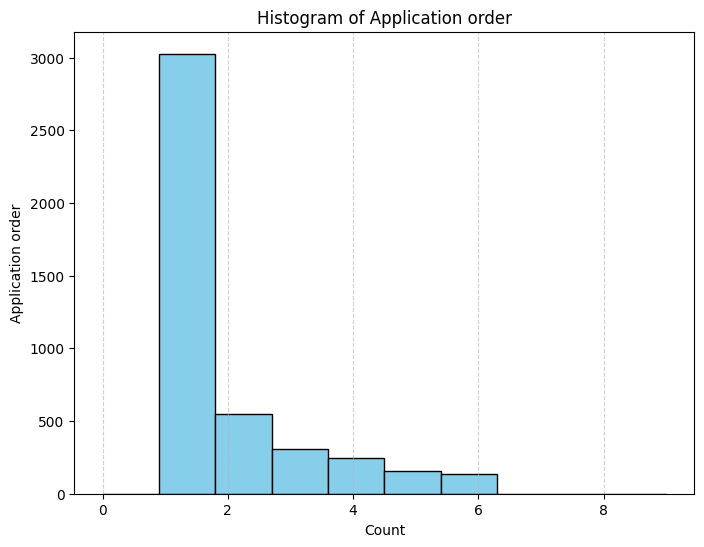

Age at enrollment


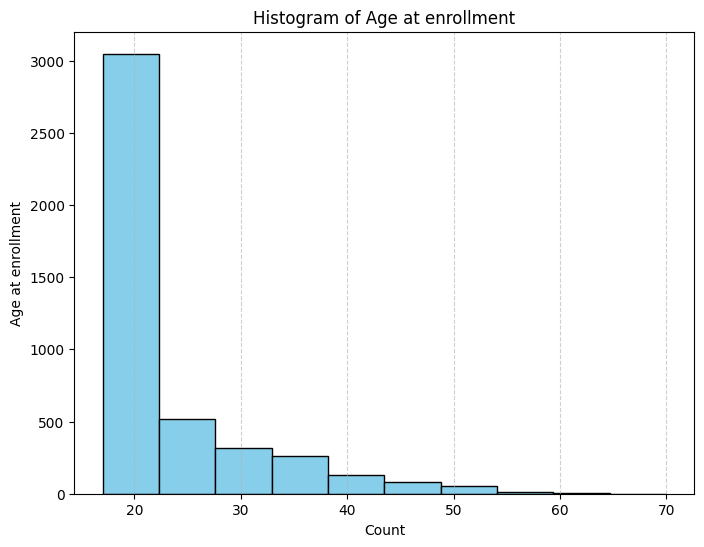

Curricular units 1st sem (credited)


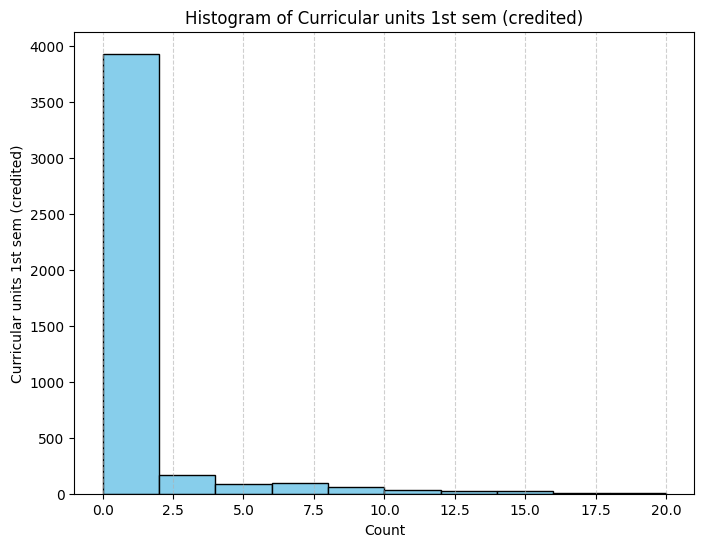

Curricular units 1st sem (enrolled)


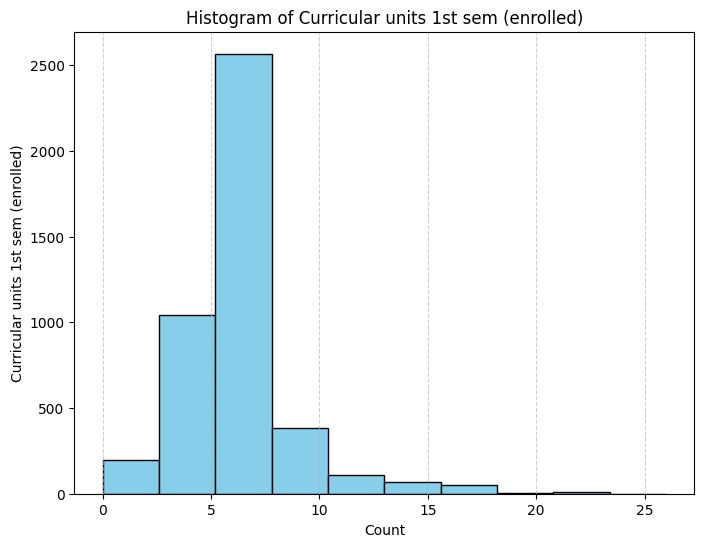

Curricular units 1st sem (evaluations)


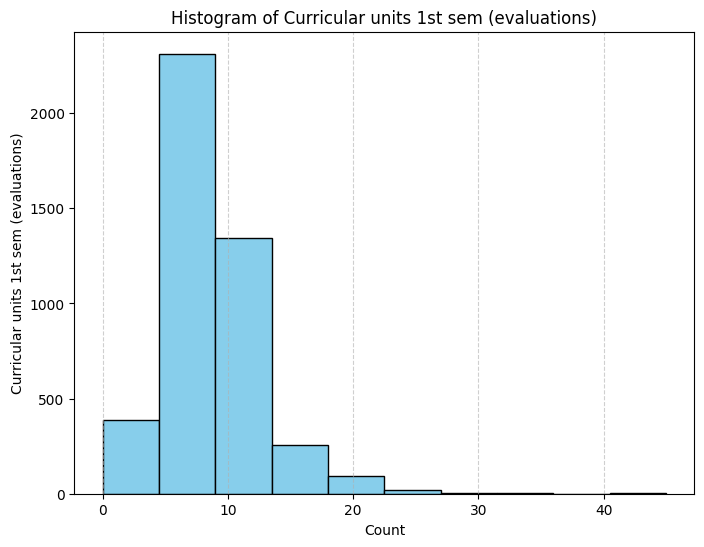

Curricular units 1st sem (approved)


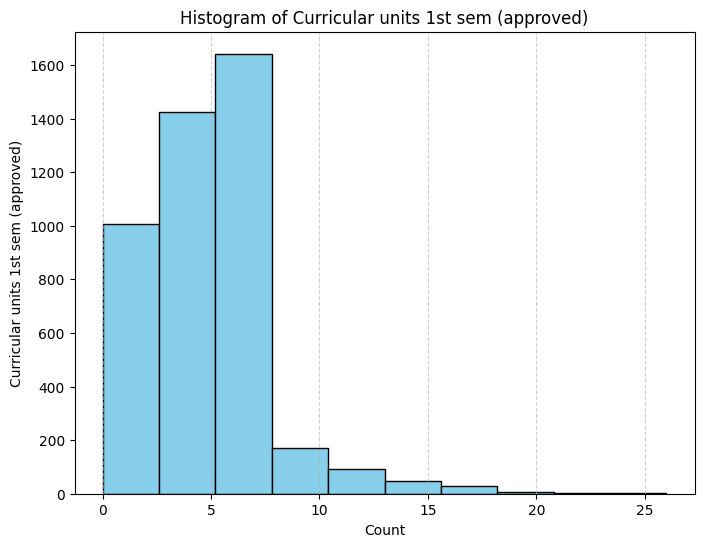

Curricular units 1st sem (without evaluations)


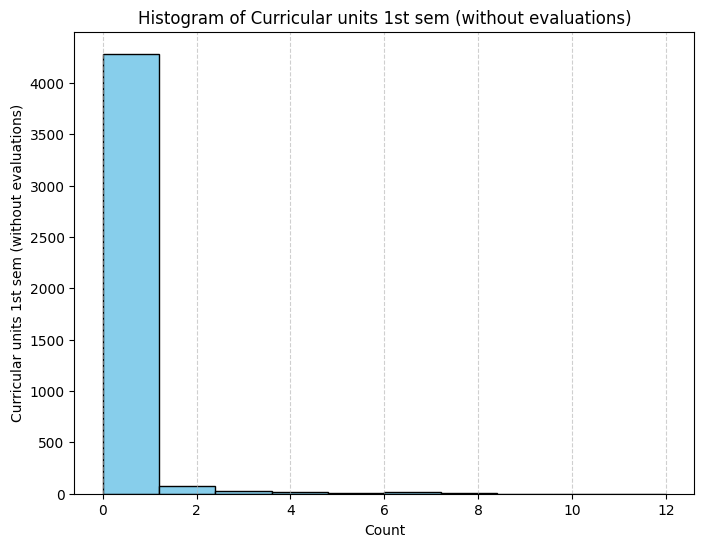

Curricular units 2nd sem (credited)


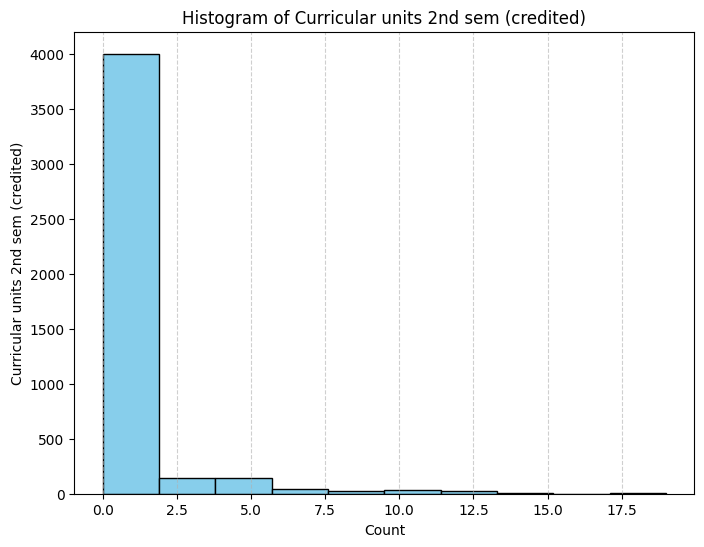

Curricular units 2nd sem (enrolled)


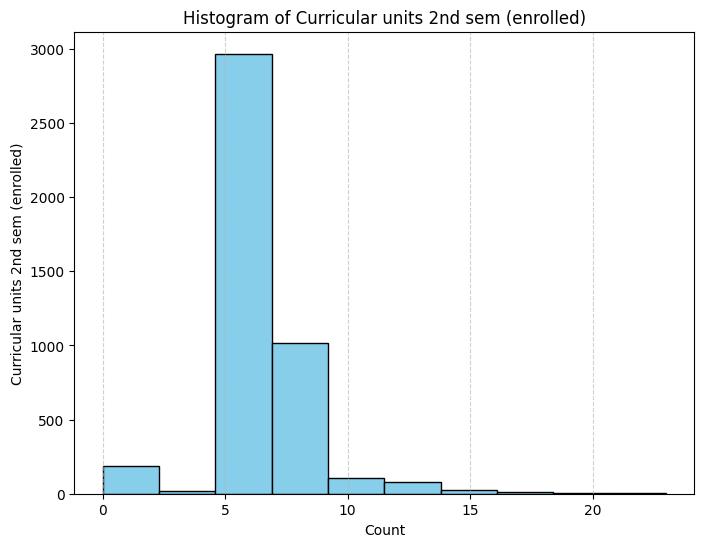

Curricular units 2nd sem (evaluations)


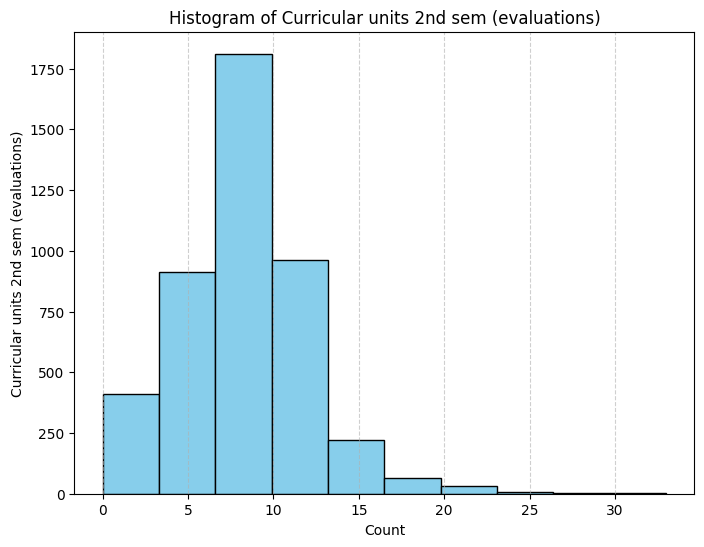

Curricular units 2nd sem (approved)


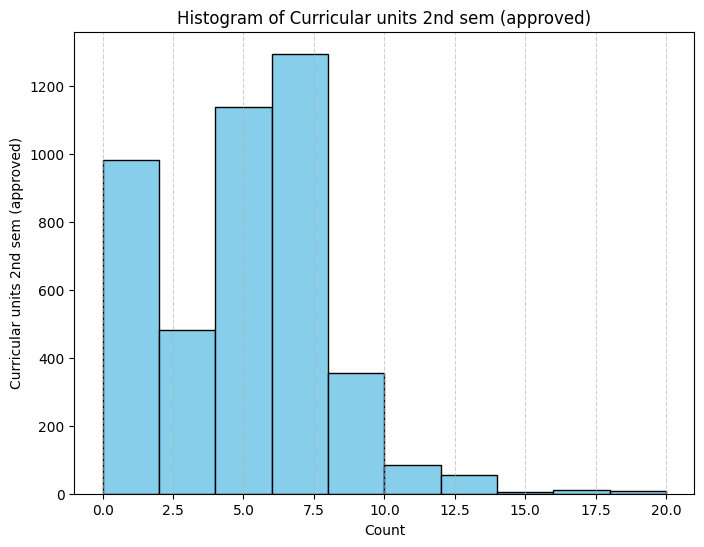

Curricular units 2nd sem (without evaluations)


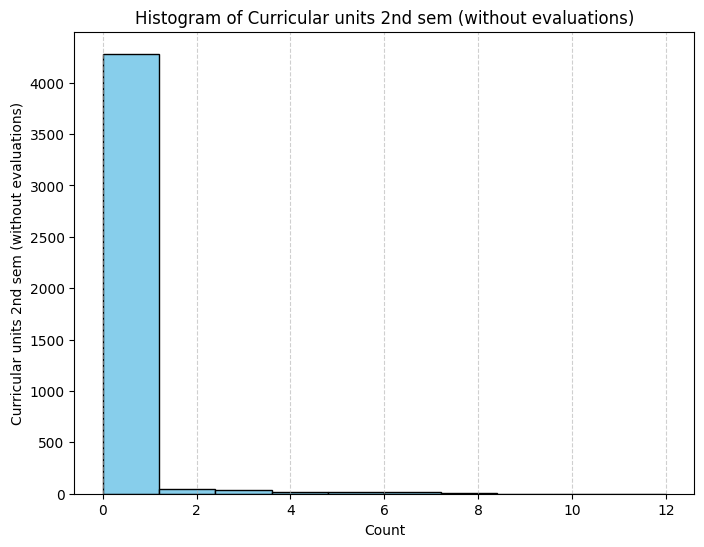

Previous qualification (grade)


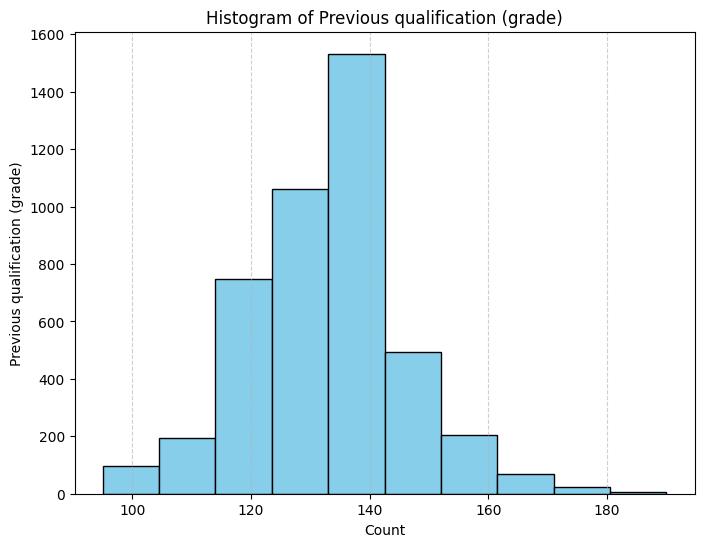

Admission grade


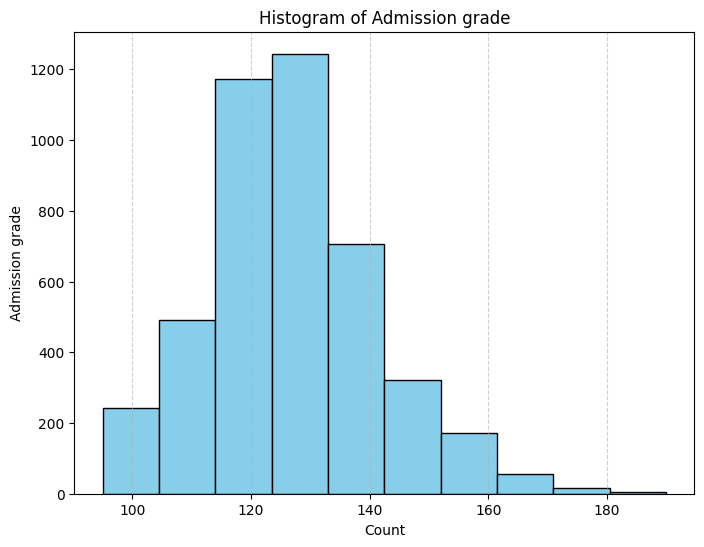

Curricular units 1st sem (grade)


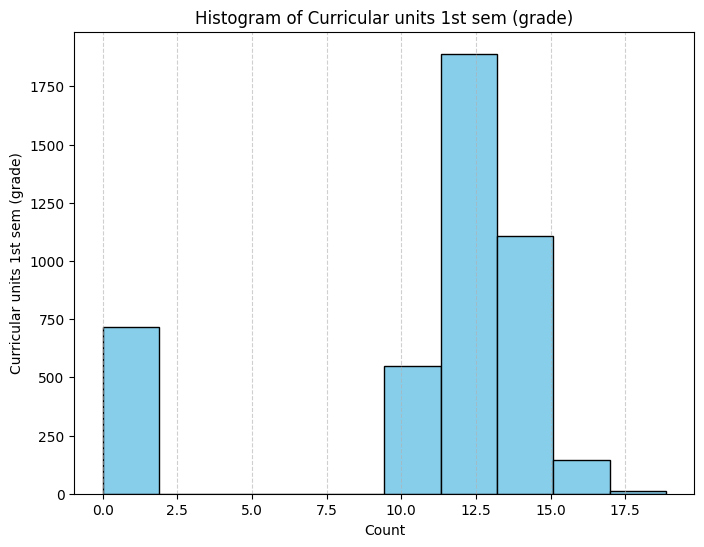

Curricular units 2nd sem (grade)


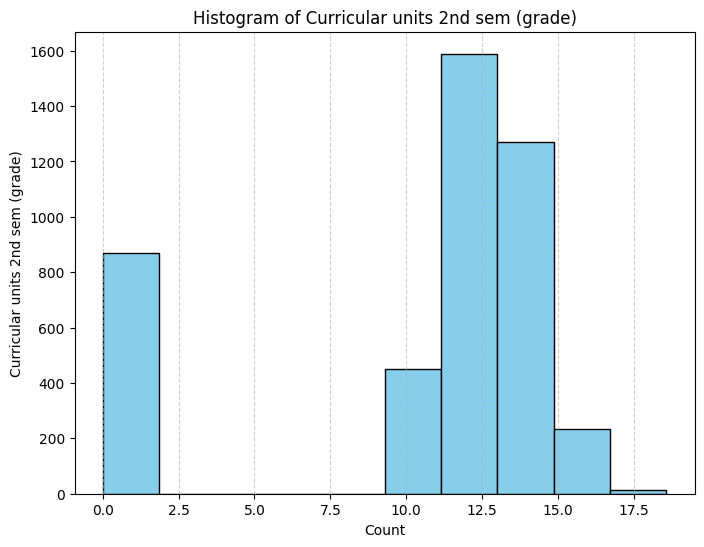

In [82]:
for col in outlier_cols:
    print(col)
    plt.figure(figsize=(8, 6))

    # Plot histogram with horizontal orientation
    plt.hist(df[col], orientation='vertical', color='skyblue', edgecolor='black')

    plt.xlabel("Count")         # Count on the x-axis
    plt.ylabel(col)             # Column values on the y-axis
    plt.title(f"Histogram of {col}")
    plt.grid(axis='x', linestyle='--', alpha=0.6)
    plt.show()

In [81]:
outlier_cols

['Application order',
 'Age at enrollment',
 'Curricular units 1st sem (credited)',
 'Curricular units 1st sem (enrolled)',
 'Curricular units 1st sem (evaluations)',
 'Curricular units 1st sem (approved)',
 'Curricular units 1st sem (without evaluations)',
 'Curricular units 2nd sem (credited)',
 'Curricular units 2nd sem (enrolled)',
 'Curricular units 2nd sem (evaluations)',
 'Curricular units 2nd sem (approved)',
 'Curricular units 2nd sem (without evaluations)',
 'Previous qualification (grade)',
 'Admission grade',
 'Curricular units 1st sem (grade)',
 'Curricular units 2nd sem (grade)']

In [76]:
df.head(20)

,Marital Status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,Mother's occupation,Father's occupation,Admission grade,Displaced,Educational special needs,Debtor,Tuition fees up to date,Gender,Scholarship holder,Age at enrollment,International,Curricular units 1st sem (credited),Curricular units 1st sem (enrolled),Curricular units 1st sem (evaluations),Curricular units 1st sem (approved),Curricular units 1st sem (grade),Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,17,5,171,1,1,122.0,1,19,12,5,9,127.3,1,0,0,1,1,0,20,0,0,0,0,0,0.000000,0,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,15,1,9254,1,1,160.0,1,1,3,3,3,142.5,1,0,0,0,1,0,19,0,0,6,6,6,14.000000,0,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,9070,1,1,122.0,1,37,37,9,9,124.8,1,0,0,0,1,0,19,0,0,6,0,0,0.000000,0,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,17,2,9773,1,1,122.0,1,38,37,5,3,119.6,1,0,0,1,0,0,20,0,0,6,8,6,13.428571,0,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,39,1,8014,0,1,100.0,1,37,38,9,9,141.5,0,0,0,1,0,0,45,0,0,6,9,5,12.333333,0,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate
5,2,39,1,9991,0,19,133.1,1,37,37,9,7,114.8,0,0,1,1,1,0,50,0,0,5,10,5,11.857143,0,0,5,17,5,11.500000,5,16.2,0.3,-0.92,Graduate
6,1,1,1,9500,1,1,142.0,1,19,38,7,10,128.4,1,0,0,1,0,1,18,0,0,7,9,7,13.300000,0,0,8,8,8,14.345000,0,15.5,2.8,-4.06,Graduate
7,1,18,4,9254,1,1,119.0,1,37,37,9,9,113.1,1,0,0,0,1,0,22,0,0,5,5,0,0.000000,0,0,5,5,0,0.000000,0,15.5,2.8,-4.06,Dropout
8,1,1,3,9238,1,1,137.0,62,1,1,9,9,129.3,0,0,0,1,0,1,21,1,0,6,8,6,13.875000,0,0,6,7,6,14.142857,0,16.2,0.3,-0.92,Graduate
9,1,1,1,9238,1,1,138.0,1,1,19,4,7,123.0,1,0,1,0,0,0,18,0,0,6,9,5,11.400000,0,0,6,14,2,13.500000,0,8.9,1.4,3.51,Dropout


In [77]:
df[df['Curricular units 2nd sem (grade)']>17]

,Marital Status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,Mother's occupation,Father's occupation,Admission grade,Displaced,Educational special needs,Debtor,Tuition fees up to date,Gender,Scholarship holder,Age at enrollment,International,Curricular units 1st sem (credited),Curricular units 1st sem (enrolled),Curricular units 1st sem (evaluations),Curricular units 1st sem (approved),Curricular units 1st sem (grade),Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
139,1,18,1,9500,1,1,178.0,1,19,1,4,8,174.7,0,0,0,1,0,0,18,0,0,7,8,7,17.125000,0,0,8,8,8,17.587500,0,13.9,-0.3,0.79,Graduate
718,2,42,1,9991,0,6,123.0,1,37,37,9,9,123.0,0,0,0,1,1,0,37,0,0,5,10,5,15.800000,0,0,5,5,5,17.600000,0,9.4,-0.8,-3.12,Enrolled
1004,1,17,2,9238,1,1,136.0,1,1,3,3,4,126.6,1,0,0,1,0,0,18,0,0,6,6,6,16.500000,0,0,6,7,6,17.428571,0,11.1,0.6,2.02,Dropout
1283,1,1,1,9119,1,1,168.0,1,19,19,4,4,171.2,0,0,0,1,1,1,18,0,0,5,6,5,17.333333,0,0,5,8,5,18.571429,0,12.4,0.5,1.79,Graduate
1293,1,17,5,9119,1,1,124.0,11,4,12,2,9,119.5,1,0,0,1,1,0,20,1,0,5,5,5,14.800000,0,0,5,5,5,17.600000,0,8.9,1.4,3.51,Graduate
2169,1,17,1,9670,1,1,145.0,1,3,3,2,1,129.3,1,0,0,1,0,0,20,0,0,6,7,6,15.571429,0,0,6,6,6,17.166667,0,16.2,0.3,-0.92,Graduate
2443,2,39,1,9003,1,3,110.0,1,3,19,4,6,150.0,0,0,0,1,1,0,32,0,0,6,8,6,18.875000,0,6,12,14,12,17.692308,0,16.2,0.3,-0.92,Graduate
3553,1,44,1,9119,1,39,150.0,1,19,37,9,9,150.0,1,0,1,1,1,0,20,0,0,5,6,5,16.500000,0,0,5,7,5,17.714286,0,12.4,0.5,1.79,Dropout


In [69]:
application_orders = [5,4,6,9]

In [75]:
df[df['Curricular units 1st sem (evaluations)']<17]

,Marital Status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,Mother's occupation,Father's occupation,Admission grade,Displaced,Educational special needs,Debtor,Tuition fees up to date,Gender,Scholarship holder,Age at enrollment,International,Curricular units 1st sem (credited),Curricular units 1st sem (enrolled),Curricular units 1st sem (evaluations),Curricular units 1st sem (approved),Curricular units 1st sem (grade),Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,17,5,171,1,1,122.0,1,19,12,5,9,127.3,1,0,0,1,1,0,20,0,0,0,0,0,0.000000,0,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,15,1,9254,1,1,160.0,1,1,3,3,3,142.5,1,0,0,0,1,0,19,0,0,6,6,6,14.000000,0,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,9070,1,1,122.0,1,37,37,9,9,124.8,1,0,0,0,1,0,19,0,0,6,0,0,0.000000,0,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,17,2,9773,1,1,122.0,1,38,37,5,3,119.6,1,0,0,1,0,0,20,0,0,6,8,6,13.428571,0,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,39,1,8014,0,1,100.0,1,37,38,9,9,141.5,0,0,0,1,0,0,45,0,0,6,9,5,12.333333,0,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4419,1,1,6,9773,1,1,125.0,1,1,1,5,4,122.2,0,0,0,1,1,0,19,0,0,6,7,5,13.600000,0,0,6,8,5,12.666667,0,15.5,2.8,-4.06,Graduate
4420,1,1,2,9773,1,1,120.0,105,1,1,9,9,119.0,1,0,1,0,0,0,18,1,0,6,6,6,12.000000,0,0,6,6,2,11.000000,0,11.1,0.6,2.02,Dropout
4421,1,1,1,9500,1,1,154.0,1,37,37,9,9,149.5,1,0,0,1,0,1,30,0,0,7,8,7,14.912500,0,0,8,9,1,13.500000,0,13.9,-0.3,0.79,Dropout
4422,1,1,1,9147,1,1,180.0,1,37,37,7,4,153.8,1,0,0,1,0,1,20,0,0,5,5,5,13.800000,0,0,5,6,5,12.000000,0,9.4,-0.8,-3.12,Graduate


In [71]:
df[df['Application order'].isin(application_orders)]

,Marital Status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,Mother's occupation,Father's occupation,Admission grade,Displaced,Educational special needs,Debtor,Tuition fees up to date,Gender,Scholarship holder,Age at enrollment,International,Curricular units 1st sem (credited),Curricular units 1st sem (enrolled),Curricular units 1st sem (evaluations),Curricular units 1st sem (approved),Curricular units 1st sem (grade),Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,17,5,171,1,1,122.0,1,19,12,5,9,127.3,1,0,0,1,1,0,20,0,0,0,0,0,0.000000,0,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
2,1,1,5,9070,1,1,122.0,1,37,37,9,9,124.8,1,0,0,0,1,0,19,0,0,6,0,0,0.000000,0,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
7,1,18,4,9254,1,1,119.0,1,37,37,9,9,113.1,1,0,0,0,1,0,22,0,0,5,5,0,0.000000,0,0,5,5,0,0.000000,0,15.5,2.8,-4.06,Dropout
21,1,18,4,9556,1,1,127.0,1,1,38,4,7,121.8,1,0,0,1,0,0,20,0,0,7,14,7,11.437500,0,0,8,9,8,11.425000,0,12.7,3.7,-1.70,Enrolled
22,1,1,4,9500,1,1,142.0,1,19,19,1,1,125.5,1,0,0,1,0,0,18,0,0,8,12,7,12.857143,0,0,8,12,7,12.857143,0,12.7,3.7,-1.70,Graduate
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4376,1,17,6,9500,1,1,143.0,1,38,1,9,10,127.3,1,0,0,1,0,0,18,0,0,7,8,7,12.217143,0,0,8,11,7,12.118750,0,11.1,0.6,2.02,Graduate
4394,1,1,4,9500,1,1,168.0,1,38,1,9,10,166.0,1,0,0,1,0,0,18,0,0,8,8,8,14.888750,0,0,8,8,8,14.888750,0,9.4,-0.8,-3.12,Graduate
4397,1,5,4,9853,1,1,116.0,1,3,38,3,8,110.4,1,0,0,1,0,0,21,0,0,6,9,5,12.600000,0,0,6,9,3,11.666667,0,9.4,-0.8,-3.12,Enrolled
4405,1,1,4,9500,1,1,160.0,1,37,37,7,7,133.0,1,0,0,1,1,1,18,0,0,8,8,7,14.314286,0,0,8,8,7,14.314286,0,12.7,3.7,-1.70,Graduate


### Investigating outliers
Outliers in the application order columns we can assume are meaningful 

In [67]:
df[df['Curricular units 2nd sem (without evaluations)']==1]

,Marital Status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,Mother's occupation,Father's occupation,Admission grade,Displaced,Educational special needs,Debtor,Tuition fees up to date,Gender,Scholarship holder,Age at enrollment,International,Curricular units 1st sem (credited),Curricular units 1st sem (enrolled),Curricular units 1st sem (evaluations),Curricular units 1st sem (approved),Curricular units 1st sem (grade),Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
45,1,17,1,9991,0,1,154.0,1,38,38,4,5,134.1,0,0,0,1,0,0,24,0,0,5,9,2,11.500000,0,0,5,11,3,14.333333,1,7.6,2.6,0.32,Enrolled
93,2,39,1,9853,1,10,133.1,1,37,34,0,0,115.5,0,0,0,1,0,0,39,0,0,6,12,3,12.666667,0,0,6,14,0,0.000000,1,7.6,2.6,0.32,Dropout
103,4,39,1,9003,1,12,133.1,1,37,37,9,6,160.0,0,0,0,1,0,0,43,0,13,18,19,18,14.631579,0,10,13,14,13,14.230769,1,15.5,2.8,-4.06,Graduate
114,1,17,2,9500,1,1,122.0,1,37,37,9,9,131.0,1,0,0,1,0,0,18,0,0,7,7,6,12.516667,1,0,7,7,6,12.516667,1,7.6,2.6,0.32,Dropout
181,1,44,1,9991,0,39,140.0,1,37,19,9,8,140.0,0,0,0,1,0,1,26,0,2,6,7,6,12.666667,0,2,6,7,6,13.166667,1,9.4,-0.8,-3.12,Enrolled
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4355,1,1,2,9085,1,1,160.0,1,4,19,2,5,162.1,1,0,0,1,0,0,18,0,0,5,8,5,16.166667,2,0,5,9,5,14.285714,1,9.4,-0.8,-3.12,Graduate
4377,2,43,1,9991,0,1,130.0,1,37,37,9,9,103.8,0,0,0,1,0,0,28,0,14,15,15,14,11.071429,0,12,14,16,12,11.333333,1,9.4,-0.8,-3.12,Dropout
4380,1,7,1,9500,1,2,140.0,1,38,37,7,8,140.0,0,0,0,1,0,0,29,0,0,8,14,4,11.325000,1,0,8,14,4,11.325000,1,12.7,3.7,-1.70,Dropout
4416,1,43,2,9500,1,1,136.0,1,38,38,9,5,131.3,0,0,0,1,0,0,23,0,11,14,15,12,12.625000,1,11,14,15,12,12.625000,1,7.6,2.6,0.32,Graduate



Preprocessing:
Handle missing values (e.g., imputation or removal).
Encode categorical features (e.g., one-hot encoding).
Normalize or standardize numerical features (especially for Logistic Regression).
Split the data into training and testing sets (e.g., 80-20 split).
Benchmark Model:
Start with Logistic Regression to establish a baseline.
Fine-tune hyperparameters (e.g., C, solver, multi_class).
Improve with Random Forest:
Train and evaluate a Random Forest model.
Fine-tune hyperparameters (e.g., n_estimators, max_depth, max_features).
Improve Further with XGBoost:
Train and evaluate an XGBoost model.
Fine-tune hyperparameters (e.g., learning_rate, max_depth, n_estimators).
Interpretability:
Use SHAP or LIME to explain the predictions of your final model (e.g., XGBoost).

In [ ]:
# !pip install scikit.learn
from sklearn.model_selection import train_test_split
X = df.drop(columns=["Target"])
y = df['Target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [92]:
from sklearn import linear_model

logistic_regression_model = linear_model.LogisticRegression()
logistic_regression_model.fit(X_train, y_train)

/Users/suhaibchoudhry/opt/anaconda3/envs/principles__of_ai_and_ml/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [94]:
logistic_regression_model.score(X_test, y_test)

0.6587570621468927